In [1]:
# import required libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report,confusion_matrix
from PIL import Image
from tensorflow.keras.preprocessing import image

In [2]:
# directories path
train_dir = 'C:/Users/aniqo/Projects/Melanoma Detection App Project/data/train_sep'
val_dir = 'C:/Users/aniqo/Projects/Melanoma Detection App Project/data/valid'
test_dir = 'C:/Users/aniqo/Projects/Melanoma Detection App Project/data/test'

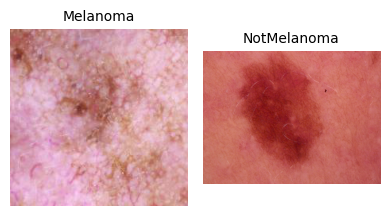

In [3]:
# shows some training data randomly
def get_random_file(folder):
    file = random.choice(os.listdir(folder))
    return os.path.join(folder, file)

categories = ["Melanoma", "NotMelanoma"]
folders = [os.path.join(train_dir, category) for category in categories]

random_files = [get_random_file(folder) for folder in folders]

fig, axes = plt.subplots(1, 2, figsize=(4, 4))
for i, (file, category) in enumerate(zip(random_files, categories)):
    axes[i].imshow(plt.imread(file))
    axes[i].set_title(category, fontsize=10)
    axes[i].axis('off')

fig.tight_layout()
plt.show()

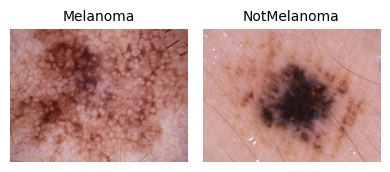

In [4]:
# shows some validation data randomly
def get_random_file(folder):
    file = random.choice(os.listdir(folder))
    return os.path.join(folder, file)

categories = ["Melanoma", "NotMelanoma"]
folders = [os.path.join(val_dir, category) for category in categories]

random_files = [get_random_file(folder) for folder in folders]

fig, axes = plt.subplots(1, 2, figsize=(4, 4))
for i, (file, category) in enumerate(zip(random_files, categories)):
    axes[i].imshow(plt.imread(file))
    axes[i].set_title(category, fontsize=10)
    axes[i].axis('off')

fig.tight_layout()
plt.show()

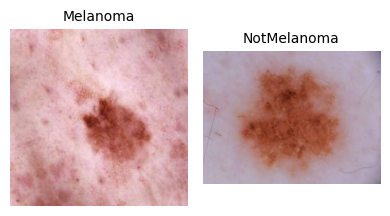

In [5]:
# shows some testing data randomly
def get_random_file(folder):
    file = random.choice(os.listdir(folder))
    return os.path.join(folder, file)

categories = ["Melanoma", "NotMelanoma"]
folders = [os.path.join(test_dir, category) for category in categories]

random_files = [get_random_file(folder) for folder in folders]

fig, axes = plt.subplots(1, 2, figsize=(4, 4))
for i, (file, category) in enumerate(zip(random_files, categories)):
    axes[i].imshow(plt.imread(file))
    axes[i].set_title(category, fontsize=10)
    axes[i].axis('off')

fig.tight_layout()
plt.show()

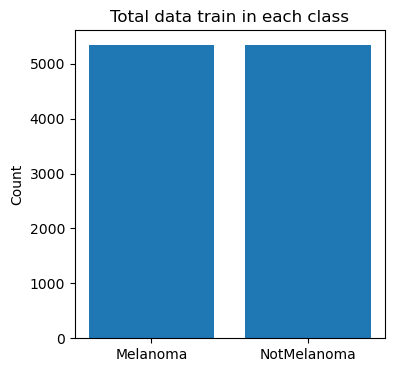

In [6]:
# compare the number of data train in each class
folders = os.listdir(train_dir)
counts = [len(os.listdir(os.path.join(train_dir, folder))) for folder in folders]

plt.figure(figsize=(4,4))
plt.bar(folders, counts)
plt.ylabel("Count")
plt.title("Total data train in each class")

plt.show()

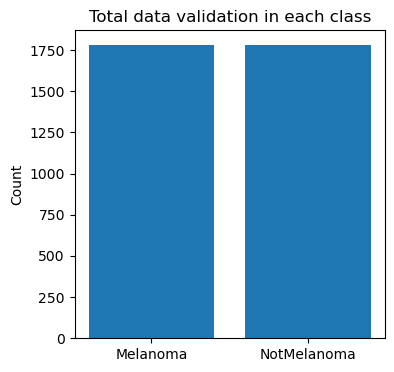

In [7]:
# compare the number of data validation in each class
folders = os.listdir(val_dir)
counts = [len(os.listdir(os.path.join(val_dir, folder))) for folder in folders]

plt.figure(figsize=(4,4))
plt.bar(folders, counts)
plt.ylabel("Count")
plt.title("Total data validation in each class")

plt.show()

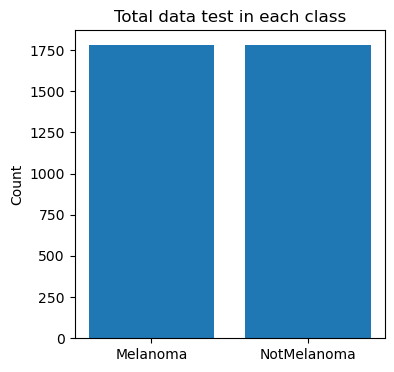

In [8]:
# compare the number of data test in each class
folders = os.listdir(test_dir)
counts = [len(os.listdir(os.path.join(test_dir, folder))) for folder in folders]

plt.figure(figsize=(4,4))
plt.bar(folders, counts)
plt.ylabel("Count")
plt.title("Total data test in each class")

plt.show()

In [9]:
# data preprocessing
train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    class_mode='categorical',
                                                    batch_size=64) 
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(224,224),
                                                class_mode='categorical', 
                                                batch_size=64)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224,224),
                                                  class_mode='categorical',
                                                  batch_size=64,
                                                  shuffle=False)

Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [10]:
# define model
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(64, activation='relu'),
                            tf.keras.layers.Dense(2, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [11]:
# compile the model
model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# handle training process
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.0001)

In [13]:
# train the model
history = model.fit(train_generator,
                    epochs=100, 
                    validation_data=val_generator,
                    callbacks=[learning_rate_reduction],
                    verbose=2)

Epoch 1/100
167/167 - 223s - loss: 0.6005 - accuracy: 0.6522 - val_loss: 0.5277 - val_accuracy: 0.6937 - lr: 0.0010 - 223s/epoch - 1s/step
Epoch 2/100
167/167 - 236s - loss: 0.5124 - accuracy: 0.7160 - val_loss: 0.4890 - val_accuracy: 0.7667 - lr: 0.0010 - 236s/epoch - 1s/step
Epoch 3/100
167/167 - 260s - loss: 0.4730 - accuracy: 0.7578 - val_loss: 0.4138 - val_accuracy: 0.7883 - lr: 0.0010 - 260s/epoch - 2s/step
Epoch 4/100
167/167 - 247s - loss: 0.4081 - accuracy: 0.8177 - val_loss: 0.3853 - val_accuracy: 0.8543 - lr: 0.0010 - 247s/epoch - 1s/step
Epoch 5/100
167/167 - 232s - loss: 0.3444 - accuracy: 0.8501 - val_loss: 0.2894 - val_accuracy: 0.8950 - lr: 0.0010 - 232s/epoch - 1s/step
Epoch 6/100
167/167 - 233s - loss: 0.2839 - accuracy: 0.8823 - val_loss: 0.2359 - val_accuracy: 0.9180 - lr: 0.0010 - 233s/epoch - 1s/step
Epoch 7/100
167/167 - 233s - loss: 0.2744 - accuracy: 0.8834 - val_loss: 0.3726 - val_accuracy: 0.8181 - lr: 0.0010 - 233s/epoch - 1s/step
Epoch 8/100

Epoch 8: Reduc

Epoch 57/100
167/167 - 233s - loss: 0.1339 - accuracy: 0.9461 - val_loss: 0.1538 - val_accuracy: 0.9394 - lr: 1.0000e-04 - 233s/epoch - 1s/step
Epoch 58/100
167/167 - 234s - loss: 0.1328 - accuracy: 0.9457 - val_loss: 0.1542 - val_accuracy: 0.9391 - lr: 1.0000e-04 - 234s/epoch - 1s/step
Epoch 59/100
167/167 - 235s - loss: 0.1335 - accuracy: 0.9465 - val_loss: 0.1514 - val_accuracy: 0.9394 - lr: 1.0000e-04 - 235s/epoch - 1s/step
Epoch 60/100
167/167 - 234s - loss: 0.1361 - accuracy: 0.9455 - val_loss: 0.1569 - val_accuracy: 0.9385 - lr: 1.0000e-04 - 234s/epoch - 1s/step
Epoch 61/100
167/167 - 234s - loss: 0.1344 - accuracy: 0.9453 - val_loss: 0.1543 - val_accuracy: 0.9377 - lr: 1.0000e-04 - 234s/epoch - 1s/step
Epoch 62/100
167/167 - 234s - loss: 0.1328 - accuracy: 0.9472 - val_loss: 0.1520 - val_accuracy: 0.9399 - lr: 1.0000e-04 - 234s/epoch - 1s/step
Epoch 63/100
167/167 - 235s - loss: 0.1318 - accuracy: 0.9482 - val_loss: 0.1544 - val_accuracy: 0.9371 - lr: 1.0000e-04 - 235s/epoch - 

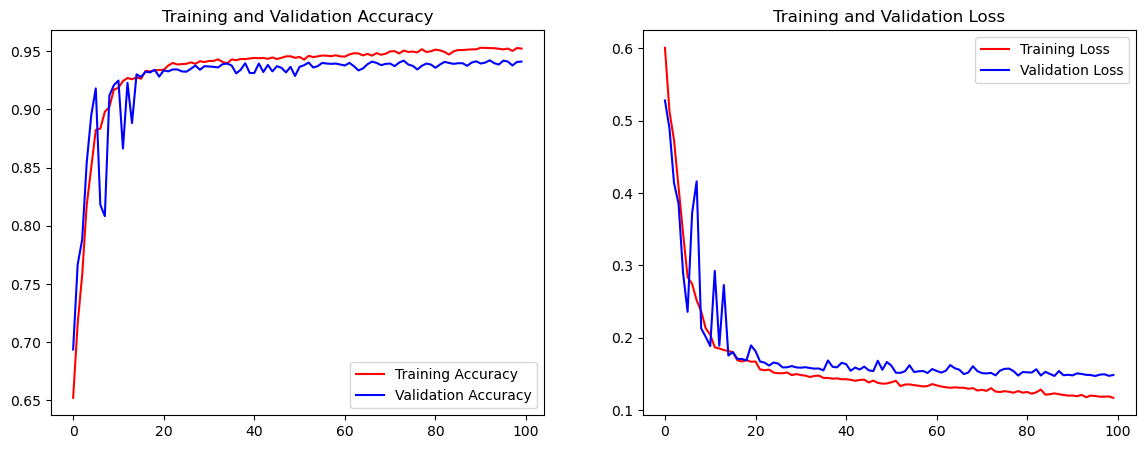

In [14]:
# evaluation of model performance during training with learning curves
def eval_plot(history):

  plt.figure(figsize=(14, 5))

  # accuracy plot
  plt.subplot(1, 2, 1)
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  # loss plot
  plt.subplot(1, 2, 2)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

eval_plot(history)

In [15]:
# test the model using data test
test_loss, test_accuracy = model.evaluate(test_generator)

56/56 [==============================] - 44s 786ms/step - loss: 0.1636 - accuracy: 0.9318


Found 3561 images belonging to 2 classes.


C:\Users\aniqo\AppData\Local\Temp\ipykernel_18400\3675881433.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator, num_of_test_samples // batch_size+1)



Confusion Matrix

[[1607  174]
 [  69 1711]]


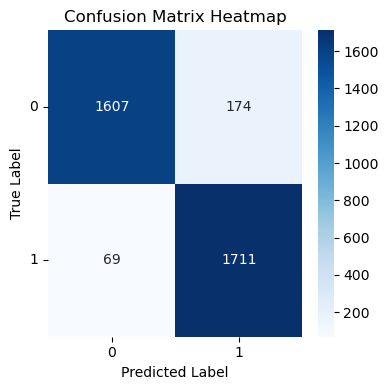

{'Melanoma': 0, 'NotMelanoma': 1}


Classification Report

              precision    recall  f1-score   support

    Melanoma       0.96      0.90      0.93      1781
 NotMelanoma       0.91      0.96      0.93      1780

    accuracy                           0.93      3561
   macro avg       0.93      0.93      0.93      3561
weighted avg       0.93      0.93      0.93      3561



In [16]:
# evaluation of model performance during testing with confusion matrix, precision, recall, and f1 score
def evaluate(model):

  test_generator = test_datagen.flow_from_directory(test_dir, 
                                                    target_size=(224,224), 
                                                    batch_size=64, 
                                                    class_mode='categorical',
                                                    shuffle=False)

  batch_size = 64
  num_of_test_samples = len(test_generator.filenames)

  Y_pred = model.predict_generator(test_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  # confusion matrix
  print('\nConfusion Matrix\n')
  cm=confusion_matrix(test_generator.classes, y_pred)
  print(cm)

  # confusion matrix heatmap visualization
  plt.figure(figsize=(4, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix Heatmap')
  plt.xticks(rotation=0)
  plt.yticks(rotation=0)
  plt.tight_layout()
  plt.show()
  print(test_generator.class_indices)

  # classification report 
  print('\n\nClassification Report\n')
  target_names = ['Melanoma', 'NotMelanoma']
  print(classification_report(test_generator.classes, y_pred, target_names=target_names))

evaluate(model)

1/1 [==============================] - 0s 190ms/step


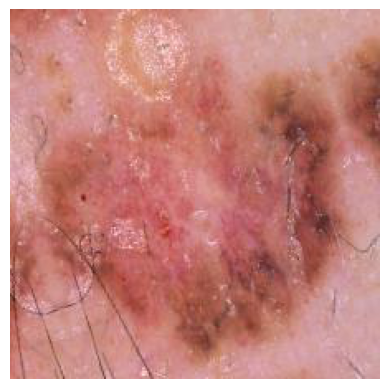


Image prediction result: Melanoma
Probability: 94.73 %


In [17]:
# upload image from local directory to test the model
def predict_image(image_array, model):
  im_array = np.asarray(image_array)  
  im_array = im_array.astype('float32') / 255.0
  im_input = np.expand_dims(im_array, axis=0)

  predictions = model.predict(im_input)[0]
  predicted_class_idx = np.argmax(predictions)

  class_labels = ['Melanoma', 'NotMelanoma']

  predicted_label = class_labels[predicted_class_idx]
  predict_proba = round(predictions[predicted_class_idx] * 100, 2)

  # Display the image
  plt.imshow(image_array)
  plt.axis('off')
  plt.show()

  print("\nImage prediction result:", predicted_label)
  print("Probability:", predict_proba, "%")

def load_image(image_path):
  img = Image.open(image_path).resize((224, 224))
  return img

# Example usage:
image_path = "C:\\Users\\aniqo\\Documents\\Melanoma Cancer Classification\\DermMel\\test\\Melanoma\\AUG_0_26.jpeg"
loaded_image = load_image(image_path)
image_array = np.asarray(loaded_image)
predict_image(image_array, model)

1/1 [==============================] - 0s 54ms/step


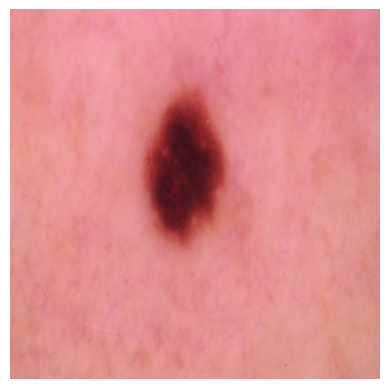


Image prediction result: NotMelanoma
Probability: 99.74 %


In [18]:
# upload image from local directory to test the model
def predict_image(image_array, model):
  im_array = np.asarray(image_array)  
  im_array = im_array.astype('float32') / 255.0
  im_input = np.expand_dims(im_array, axis=0)

  predictions = model.predict(im_input)[0]
  predicted_class_idx = np.argmax(predictions)

  class_labels = ['Melanoma', 'NotMelanoma']

  predicted_label = class_labels[predicted_class_idx]
  predict_proba = round(predictions[predicted_class_idx] * 100, 2)

  # Display the image
  plt.imshow(image_array)
  plt.axis('off')
  plt.show()

  print("\nImage prediction result:", predicted_label)
  print("Probability:", predict_proba, "%")

def load_image(image_path):
  img = Image.open(image_path).resize((224, 224))
  return img

# Example usage:
image_path = "C:\\Users\\aniqo\\Documents\\Melanoma Cancer Classification\\DermMel\\test\\NotMelanoma\\ISIC_0024393.jpg"
loaded_image = load_image(image_path)
image_array = np.asarray(loaded_image)
predict_image(image_array, model)

1/1 [==============================] - 0s 36ms/step


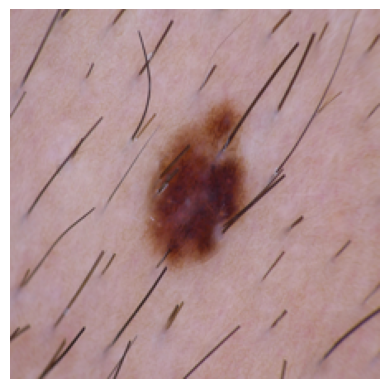


Image prediction result: NotMelanoma
Probability: 54.68 %


In [19]:
# upload image from local directory to test the model
def predict_image(image_array, model):
  im_array = np.asarray(image_array)  
  im_array = im_array.astype('float32') / 255.0
  im_input = np.expand_dims(im_array, axis=0)

  predictions = model.predict(im_input)[0]
  predicted_class_idx = np.argmax(predictions)

  class_labels = ['Melanoma', 'NotMelanoma']

  predicted_label = class_labels[predicted_class_idx]
  predict_proba = round(predictions[predicted_class_idx] * 100, 2)

  # Display the image
  plt.imshow(image_array)
  plt.axis('off')
  plt.show()

  print("\nImage prediction result:", predicted_label)
  print("Probability:", predict_proba, "%")

def load_image(image_path):
  img = Image.open(image_path).resize((224, 224))
  return img

# Example usage:
image_path = "C:\\Users\\aniqo\\Documents\\Melanoma Cancer Classification\\DermMel\\test\\NotMelanoma\\ISIC_0024813.jpg"
loaded_image = load_image(image_path)
image_array = np.asarray(loaded_image)
predict_image(image_array, model)

In [20]:
# save the model
keras_file='FourthModel.h5'
tf.keras.models.save_model(model,keras_file)